In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
business = pd.read_csv('Untitled Folder/bsn.csv')

In [3]:
business.head()
business['date'] = pd.to_datetime(business['date'])
business.head()

,date,visitas,contactos,mqls,sqls,deals,eur_medios,eur_servicios,eur_plataforma,eur_real
0,2016-04-01,1098,6,5,0,0,0.00,0,0,0.00
1,2016-05-01,1072,88,68,2,0,205.43,11900,3140,15245.43
2,2016-06-01,1290,77,49,5,3,1079.81,5700,740,7519.81
3,2016-07-01,1392,95,54,8,4,975.68,2900,740,4615.68
4,2016-08-01,1873,129,73,12,5,1215.18,2900,740,4855.18


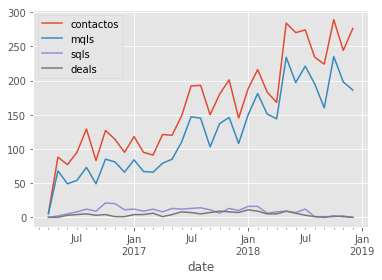

In [4]:
business.plot('date',['contactos','mqls', 'sqls', 'deals'], legend=True)
plt.show()

In [5]:
#Aquí vemos por simple detección visual que hay un change point (https://en.wikipedia.org/wiki/Change_detection)
#alrededor de julio de 2018. Hasta este punto vemos una correlacción entre contactos-mqls-sqls-deals, pero a partir de este
#punto comienzan a diverger: contactos y mqls siguen la tendencia alcista mientras que sqls y deals se desploman.
#Habría que averiguar qué ha ocurrido en esta compañía para que ocurra este cambio tan determinante.


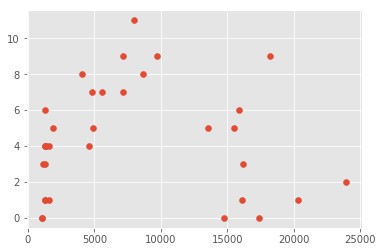

In [35]:
x_visitas = np.array(business['visitas']).reshape(-1, 1)
y_deals = np.array(business ['deals']).reshape(-1, 1)

plt.scatter(x_visitas, y_deals)
plt.show()

In [7]:
#Si intentáramos determinar un modelo en de visitas-deals nos sería imposible ya que la correlación está totalmente corrupta.

In [17]:
regr = linear_model.LinearRegression()

In [21]:
regr.fit(x_visitas, y_deals)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
y_pred = regr.predict(x_visitas)
y_pred

array([4.35530183, 4.35538842, 4.35466234, 4.35432262, 4.35272058,
       4.35527185, 4.3536465 , 4.35353992, 4.354679  , 4.354679  ,
       4.354679  , 4.354679  , 4.354679  , 4.34361128, 4.34537652,
       4.34283524, 4.3426454 , 4.34047049, 4.33519476, 4.33022211,
       4.3351015 , 4.33244698, 4.32652843, 4.31372213, 4.30727068,
       4.29834456, 4.30596507, 4.30519236, 4.3053822 , 4.30985192,
       4.2791834 , 4.29132358, 4.30108235])

In [24]:
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_deals, y_pred))
print('Variance score: %.2f' % r2_score(y_deals, y_pred))

Coefficients: 
 [-3.3306393e-06]
Independent term: 
 4.358958868357695
Mean squared error: 9.31
Variance score: 0.00


In [32]:
#si aplicamos este modelo e intentamos ver cuantos deals tendríamos por número de visitas, vemos que pasa lo siguiente:

pred = regr.predict([[100000000]])
print(int(pred))

-328
